In [1]:
from pandas_datareader import data as pdr
from datetime import date,datetime,timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
tickers = ['^W5000', '^DJI', '^GSPC']
start_date = datetime.strftime(datetime.now() - timedelta(days=20*365), '%Y-%m-%d')
end_date = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
print (end_date, start_date)

2020-05-14 2000-05-20


## Get Data From Yahoo Finance using Pandas Datareader

In [3]:
index_data = pdr.DataReader(tickers, 'yahoo', start_date, end_date)
index_data

Attributes          High                                      Low  \
Symbols             ^DJI        ^GSPC        ^W5000          ^DJI   
Date                                                                
2000-05-22  10664.540039  1410.550049  12893.339844  10369.490234   
2000-05-23  10557.450195  1403.770020  12610.679688  10416.780273   
2000-05-24  10554.879883  1401.750000  12804.240234  10364.009766   
2000-05-25  10558.650391  1411.650024  12646.639648  10266.000000   
2000-05-26  10387.660156  1391.420044  12617.040039  10258.809570   
2000-05-30  10528.150391  1422.449951  13080.620117  10302.309570   
2000-05-31  10599.429688  1434.489990  13052.959961  10490.799805   
2000-06-01  10673.450195  1448.810059  13368.110352  10513.080078   
2000-06-02  10846.080078  1483.229980  13734.370117  10660.089844   
2000-06-05  10863.000000  1477.280029  13678.799805  10752.280273   
2000-06-06  10822.610352  1471.359985  13645.540039  10707.719727   
2000-06-07  10848.379883  1474.640015  13725.339844  10695.179688   
2000-06-08  10823.660156  1475.650024  13645.540039  10635.730469   
2000-06-09  10763.769531  1472.670044  13644.900391  10588.290039   
2000-06-12  10652.589844  1462.930054  13491.250000  10564.209961   
2000-06-13  10654.719727  1470.420044  13687.849609  10492.790039   
2000-06-14  10737.709961  1483.619995  13670.219727  10624.679688   
2000-06-15  10763.700195  1482.040039  13737.480469  10669.209961   
2000-06-16  10724.830078  1480.770020  13634.580078  10449.299805   
2000-06-19  10597.440430  1488.930054  13856.790039  10440.110352   
2000-06-20  10561.379883  1487.319946  13818.110352  10407.940430   
2000-06-21  10521.070312  1482.189941  13862.209961  10410.059570   
2000-06-22  10495.969727  1479.130005  13605.049805  10335.459961   
2000-06-23  10478.650391  1459.939941  13477.690430  10376.469727   
2000-06-26  10566.679688  1459.660034  13603.160156  10403.690430   
2000-06-27  10615.830078  1463.349976  13536.799805  10504.459961   
2000-06-28  10620.419922  1467.630005  13629.860352  10506.389648   
2000-06-29  10523.900391  1455.140015  13535.450195  10359.500000   
2000-06-30  10448.240234  1454.680054  13618.500000  10336.160156   
2000-07-03  10565.620117  1469.579956  13750.290039  10422.080078   
...                  ...          ...           ...           ...   
2020-04-02  21477.769531  2533.219971  25328.720703  20735.019531   
2020-04-03  21447.810547  2538.179932  25294.810547  20863.089844   
2020-04-06  22783.449219  2676.850098  26647.269531  21693.630859   
2020-04-07  23617.240234  2756.889893  27451.189453  22634.449219   
2020-04-08  23513.400391  2760.750000  27549.820312  22682.990234   
2020-04-09  24008.990234  2818.570068  28217.949219  23504.089844   
2020-04-13  23698.929688  2782.459961  27875.509766  23095.349609   
2020-04-14  24040.580078  2851.850098  28517.400391  23683.439453   
2020-04-15  23649.720703  2801.879883  28031.419922  23233.320312   
2020-04-16  23598.080078  2806.510010  28056.029297  23211.380859   
2020-04-17  24264.210938  2879.219971  28806.070312  23817.150391   
2020-04-20  24108.689453  2868.979980  28742.259766  23627.189453   
2020-04-21  23365.250000  2785.540039  27919.509766  22941.880859   
2020-04-22  23613.099609  2815.100098  28197.289062  23339.599609   
2020-04-23  23885.359375  2844.899902  28550.890625  23483.349609   
2020-04-24  23826.000000  2842.709961  28548.080078  23417.679688   
2020-04-27  24207.650391  2887.719971  29084.859375  23840.609375   
2020-04-28  24512.240234  2921.149902  29447.779297  24031.199219   
2020-04-29  24764.769531  2954.860107  29871.560547  24453.990234   
2020-04-30  24585.570312  2930.909912  29667.349609  24186.900391   
2020-05-01  24120.779297  2869.090088  28914.589844  23645.300781   
2020-05-04  23769.560547  2844.239990  28646.029297  23361.160156   
2020-05-05  24169.720703  2898.229980  29231.949219  23868.910156   
2020-05-06  24054.589844  2891.110107  29147.410156  23661.140625  

## Flatten Multi-Index Columns to Single Columns

In [4]:
index_data.columns = index_data.columns.map('{0[0]}|{0[1]}'.format)
index_data.reset_index(inplace=True)
index_data

,Date,High|^DJI,High|^GSPC,High|^W5000,Low|^DJI,Low|^GSPC,Low|^W5000,Open|^DJI,Open|^GSPC,Open|^W5000,Close|^DJI,Close|^GSPC,Close|^W5000,Volume|^DJI,Volume|^GSPC,Volume|^W5000,Adj Close|^DJI,Adj Close|^GSPC,Adj Close|^W5000
0,2000-05-22,10664.540039,1410.550049,12893.339844,10369.490234,1368.729980,12893.339844,10624.790039,1406.949951,12893.339844,10542.549805,1400.719971,12893.339844,185570000.0,8.690000e+08,0.0,10542.549805,1400.719971,12893.339844
1,2000-05-23,10557.450195,1403.770020,12610.679688,10416.780273,1373.430054,12610.679688,10539.120117,1400.719971,12610.679688,10422.269531,1373.859985,12610.679688,157080000.0,8.699000e+08,0.0,10422.269531,1373.859985,12610.679688
2,2000-05-24,10554.879883,1401.750000,12804.240234,10364.009766,1361.089966,12804.240234,10420.900391,1373.859985,12804.240234,10535.349609,1399.050049,12804.240234,225350000.0,1.152300e+09,0.0,10535.349609,1399.050049,12804.240234
3,2000-05-25,10558.650391,1411.650024,12646.639648,10266.000000,1373.930054,12646.639648,10529.870117,1399.050049,12646.639648,10323.919922,1381.520020,12646.639648,184380000.0,9.845000e+08,0.0,10323.919922,1381.520020,12646.639648
4,2000-05-26,10387.660156,1391.420044,12617.040039,10258.809570,1369.750000,12617.040039,10322.889648,1381.520020,12617.040039,10299.240234,1378.020020,12617.040039,129200000.0,7.226000e+08,0.0,10299.240234,1378.020020,12617.040039
5,2000-05-30,10528.150391,1422.449951,13080.620117,10302.309570,1378.020020,13080.620117,10302.309570,1378.020020,13080.620117,10527.129883,1422.449951,13080.620117,165450000.0,8.442000e+08,0.0,10527.129883,1422.449951,13080.620117
6,2000-05-31,10599.429688,1434.489990,13052.959961,10490.799805,1415.500000,13052.959961,10528.280273,1422.439941,13052.959961,10522.330078,1420.599976,13052.959961,162880000.0,9.605000e+08,0.0,10522.330078,1420.599976,13052.959961
7,2000-06-01,10673.450195,1448.810059,13368.110352,10513.080078,1420.599976,13368.110352,10532.269531,1420.599976,13368.110352,10652.200195,1448.810059,13368.110352,183990000.0,9.601000e+08,0.0,10652.200195,1448.810059,13368.110352
8,2000-06-02,10846.080078,1483.229980,13734.370117,10660.089844,1448.810059,13734.370117,10660.089844,1448.810059,13734.370117,10794.759766,1477.260010,13734.370117,200900000.0,1.162400e+09,0.0,10794.759766,1477.260010,13734.370117
9,2000-06-05,10863.000000,1477.280029,13678.799805,10752.280273,1464.680054,13678.799805,10793.110352,1477.260010,13678.799805,10815.299805,1467.630005,13678.799805,151120000.0,8.386000e+08,0.0,10815.299805,1467.630005,13678.799805


## Subset DJI, GSPC, W5000 Datasets Separately

In [5]:
dji_index_data = index_data[['Date']].join(index_data[index_data.columns[index_data.columns.str.contains('DJI')]])
gspc_index_data = index_data[['Date']].join(index_data[index_data.columns[index_data.columns.str.contains('GSPC')]])
wilshere_index_data = index_data[['Date']].join(index_data[index_data.columns[index_data.columns.str.contains('W5000')]])
print(dji_index_data,gspc_index_data,wilshere_index_data)

           Date     High|^DJI      Low|^DJI     Open|^DJI    Close|^DJI  \
0    2000-05-22  10664.540039  10369.490234  10624.790039  10542.549805   
1    2000-05-23  10557.450195  10416.780273  10539.120117  10422.269531   
2    2000-05-24  10554.879883  10364.009766  10420.900391  10535.349609   
3    2000-05-25  10558.650391  10266.000000  10529.870117  10323.919922   
4    2000-05-26  10387.660156  10258.809570  10322.889648  10299.240234   
5    2000-05-30  10528.150391  10302.309570  10302.309570  10527.129883   
6    2000-05-31  10599.429688  10490.799805  10528.280273  10522.330078   
7    2000-06-01  10673.450195  10513.080078  10532.269531  10652.200195   
8    2000-06-02  10846.080078  10660.089844  10660.089844  10794.759766   
9    2000-06-05  10863.000000  10752.280273  10793.110352  10815.299805   
10   2000-06-06  10822.610352  10707.719727  10822.610352  10735.570312   
11   2000-06-07  10848.379883  10695.179688  10733.480469  10812.860352   
12   2000-06-08  10823.66

## Rename The Columns

In [6]:
dji_index_data = dji_index_data.rename(columns={"High|^DJI" : "High", "Low|^DJI" : "Low", "Open|^DJI" : "Open", "Close|^DJI" : "Close", "Volume|^DJI" : "Volume", "Adj Close|^DJI" : "Adj Close"})
gspc_index_data = gspc_index_data.rename(columns={"High|^GSPC" : "High", "Low|^GSPC" : "Low", "Open|^GSPC" : "Open", "Close|^GSPC" : "Close", "Volume|^GSPC" : "Volume", "Adj Close|^GSPC" : "Adj Close"})
wilshere_index_data = wilshere_index_data.rename(columns={"High|^W5000" : "High", "Low|^W5000" : "Low", "Open|^W5000" : "Open", "Close|^W5000" : "Close", "Volume|^W5000" : "Volume", "Adj Close|^W5000" : "Adj Close"})

## Find One Day Logarithmic Return

In [7]:
dji_index_data['Log_Ret_1D'] = np.log(dji_index_data['Close']/dji_index_data['Close'].shift(1))
gspc_index_data['Log_Ret_1D'] = np.log(gspc_index_data['Close']/gspc_index_data['Close'].shift(1))
wilshere_index_data['Log_Ret_1D'] = np.log(wilshere_index_data['Close']/wilshere_index_data['Close'].shift(1))

## Calculate Rolling Period Returns , Volumes, Volatilites

In [8]:
period = [5,10,15,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360,380,400]
for i in period:
    dji_index_data['Log_Ret_' + str(i//5) + 'w'] = dji_index_data['Log_Ret_1D'].rolling(window=i).sum()
    gspc_index_data['Log_Ret_' + str(i//5) + 'w'] = gspc_index_data['Log_Ret_1D'].rolling(window=i).sum()
    wilshere_index_data['Log_Ret_' + str(i//5) + 'w'] = wilshere_index_data['Log_Ret_1D'].rolling(window=i).sum()
for i in period:
    dji_index_data['Volume_' + str(i//5) + 'w'] = dji_index_data['Volume'].rolling(window=i).sum()
    gspc_index_data['Volume_' + str(i//5) + 'w'] = gspc_index_data['Volume'].rolling(window=i).sum()
    wilshere_index_data['Volume_' + str(i//5) + 'w'] = wilshere_index_data['Volume'].rolling(window=i).sum()
for i in period:
    dji_index_data['Volatility_' +str(i//5) +'w'] = dji_index_data['Log_Ret_1D'].rolling(window=i).std()*np.sqrt(i)
    gspc_index_data['Volatility_' +str(i//5) +'w'] = gspc_index_data['Log_Ret_1D'].rolling(window=i).std()*np.sqrt(i)
    wilshere_index_data['Volatility_' +str(i//5) +'w'] = wilshere_index_data['Log_Ret_1D'].rolling(window=i).std()*np.sqrt(i)

In [9]:
dji_index_data['Return_Label']=dji_index_data['Log_Ret_1D'].shift(-21).rolling(window=21).sum()
gspc_index_data['Return_Label']=gspc_index_data['Log_Ret_1D'].shift(-21).rolling(window=21).sum()
wilshere_index_data['Return_Label']=wilshere_index_data['Log_Ret_1D'].shift(-21).rolling(window=21).sum()

dji_index_data['Label'] = np.where(dji_index_data['Return_Label'] > 0,1,0)
gspc_index_data['Label'] = np.where(gspc_index_data['Return_Label'] > 0,1,0)
wilshere_index_data['Label'] = np.where(wilshere_index_data['Return_Label'] > 0,1,0)

In [10]:
dji_index_data = dji_index_data.dropna()
gspc_index_data = gspc_index_data.dropna()
wilshere_index_data = wilshere_index_data.dropna()

dji_index_data.drop(["High","Low","Open","Close","Volume","Adj Close","Return_Label"], axis=1, inplace=True)
gspc_index_data.drop(["High","Low","Open","Close","Volume","Adj Close","Return_Label"], axis=1, inplace=True)
wilshere_index_data.drop(["High","Low","Open","Close","Volume","Adj Close","Return_Label"], axis=1, inplace=True)

## Plot the Returns, Volume and Volatility

## Plot the Returns for each period

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F57D4F1908>,
      dtype=object)

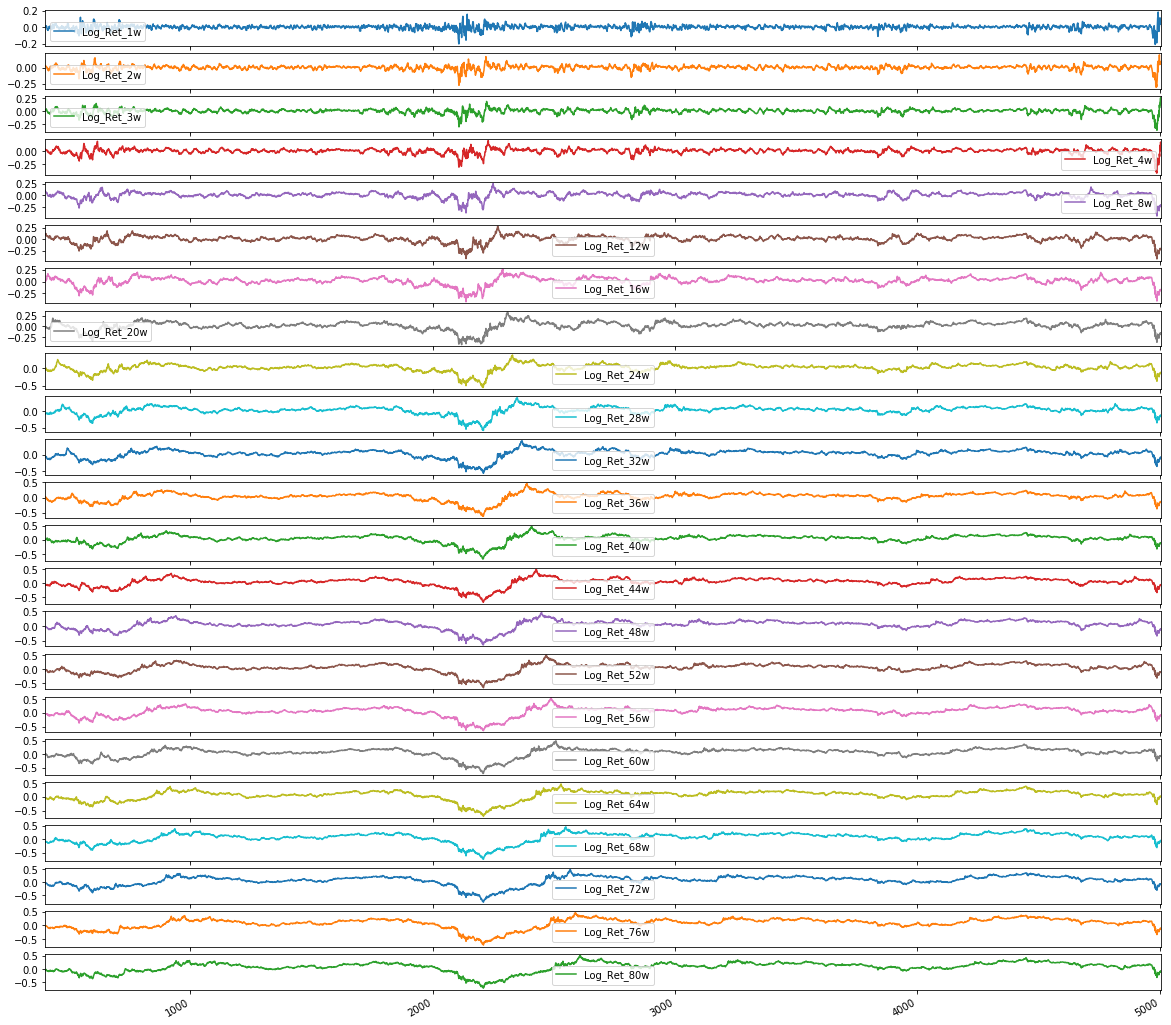

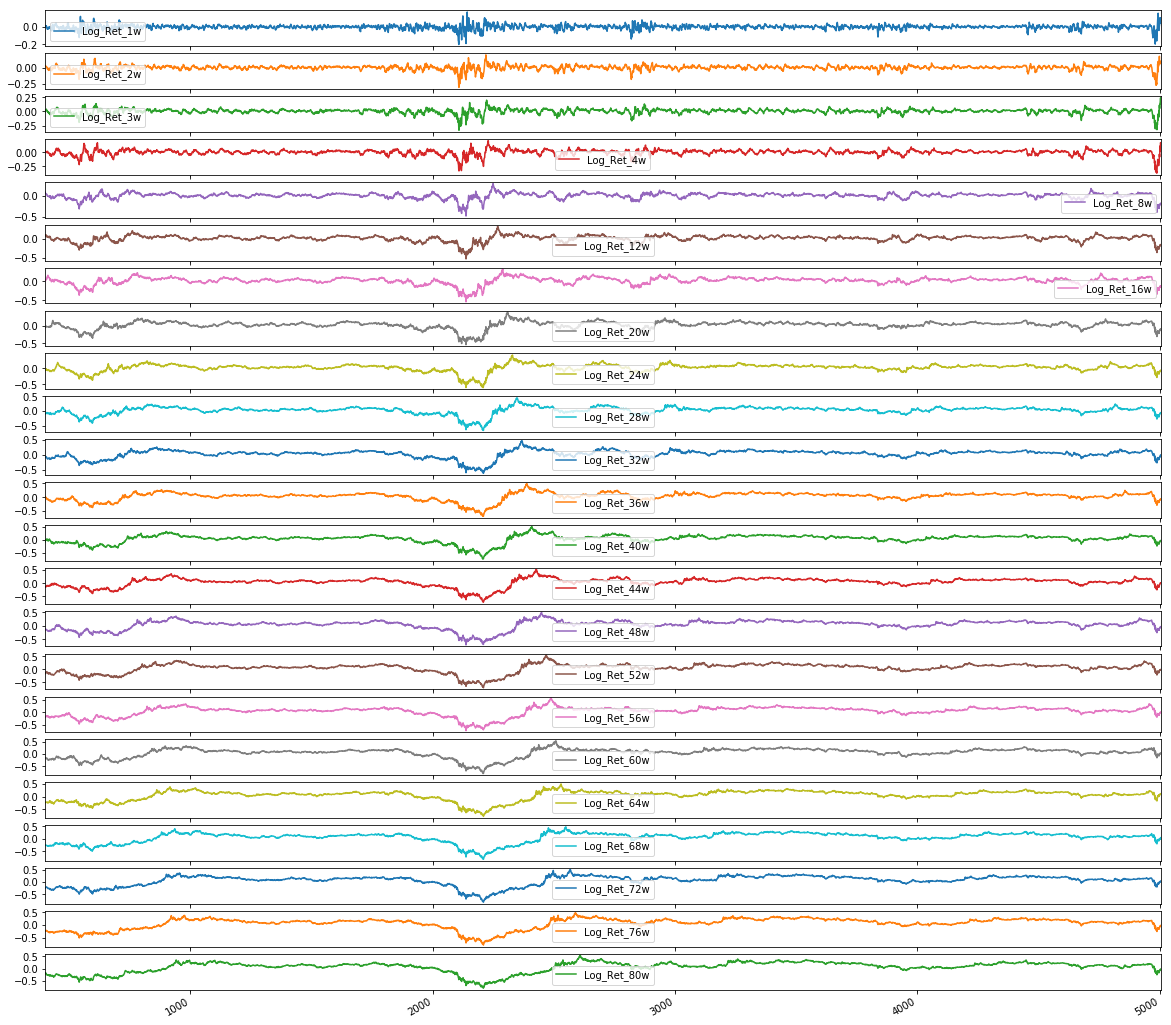

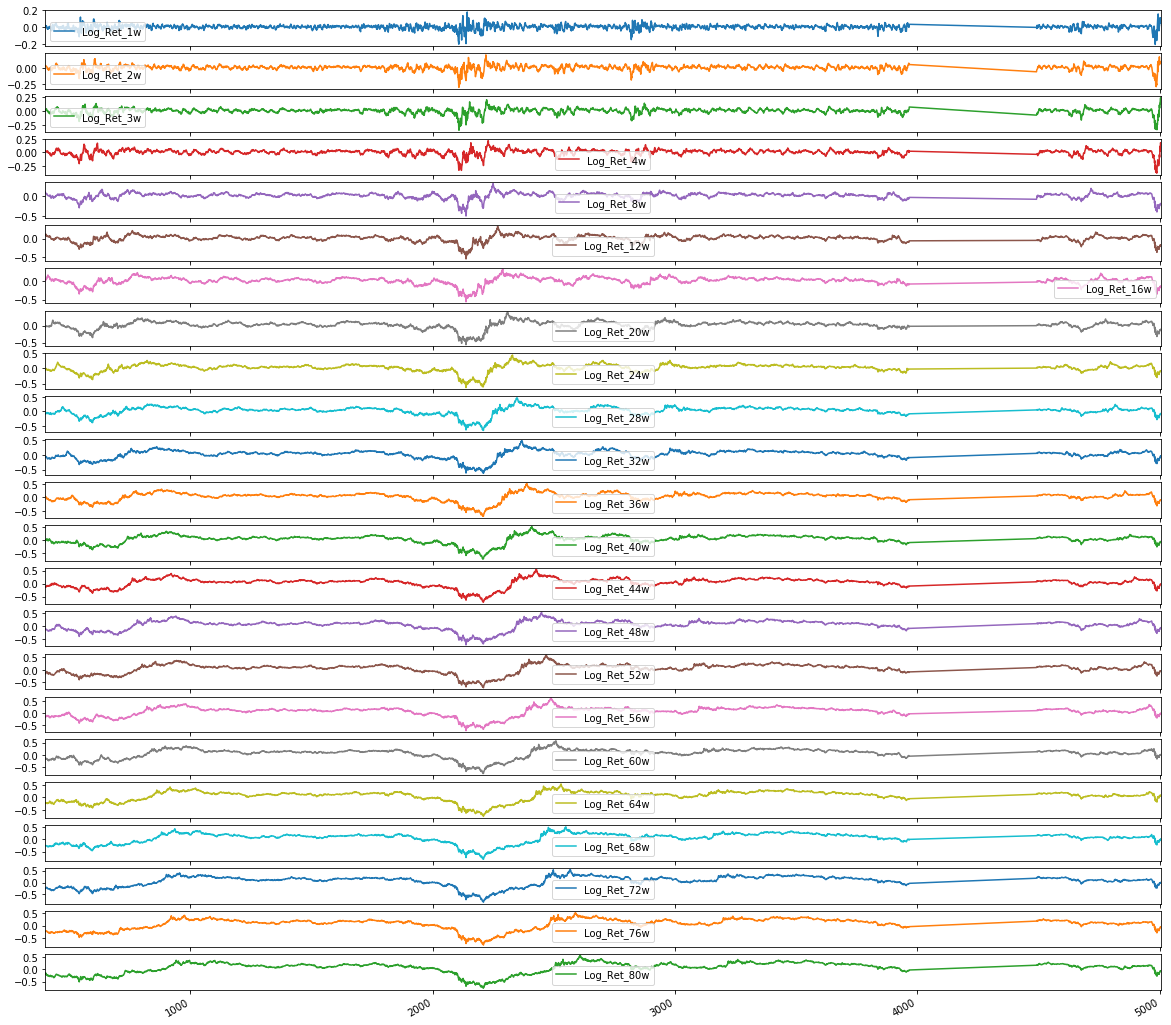

In [11]:
dji_index_data.iloc[:,2:len(period)+2].plot(subplots=True,figsize=(20,20))
gspc_index_data.iloc[:,2:len(period)+2].plot(subplots=True,figsize=(20,20))
wilshere_index_data.iloc[:,2:len(period)+2].plot(subplots=True,figsize=(20,20))

## Plot the Volumes for each period

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5799DC3C8>,
      dtype=object)

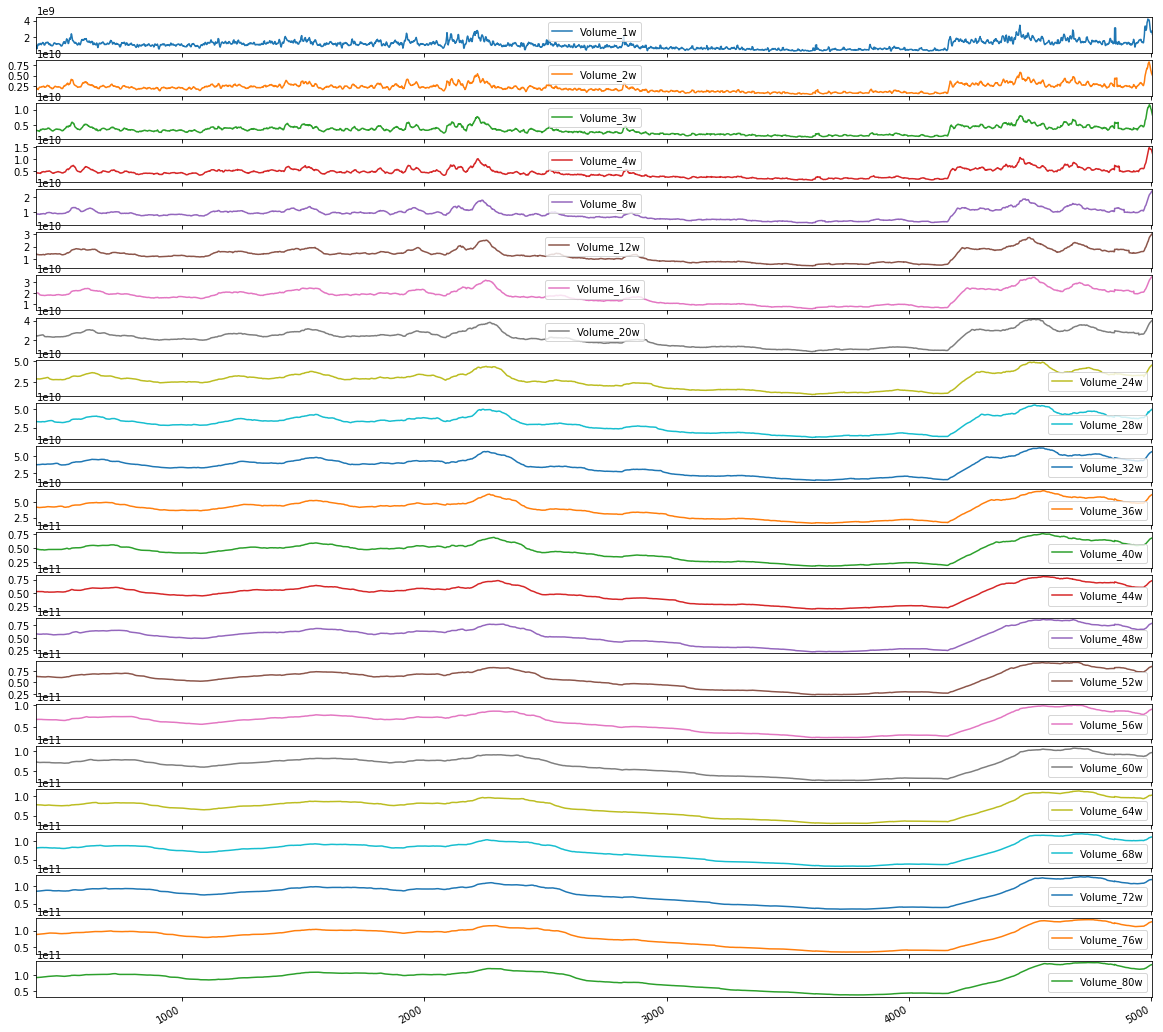

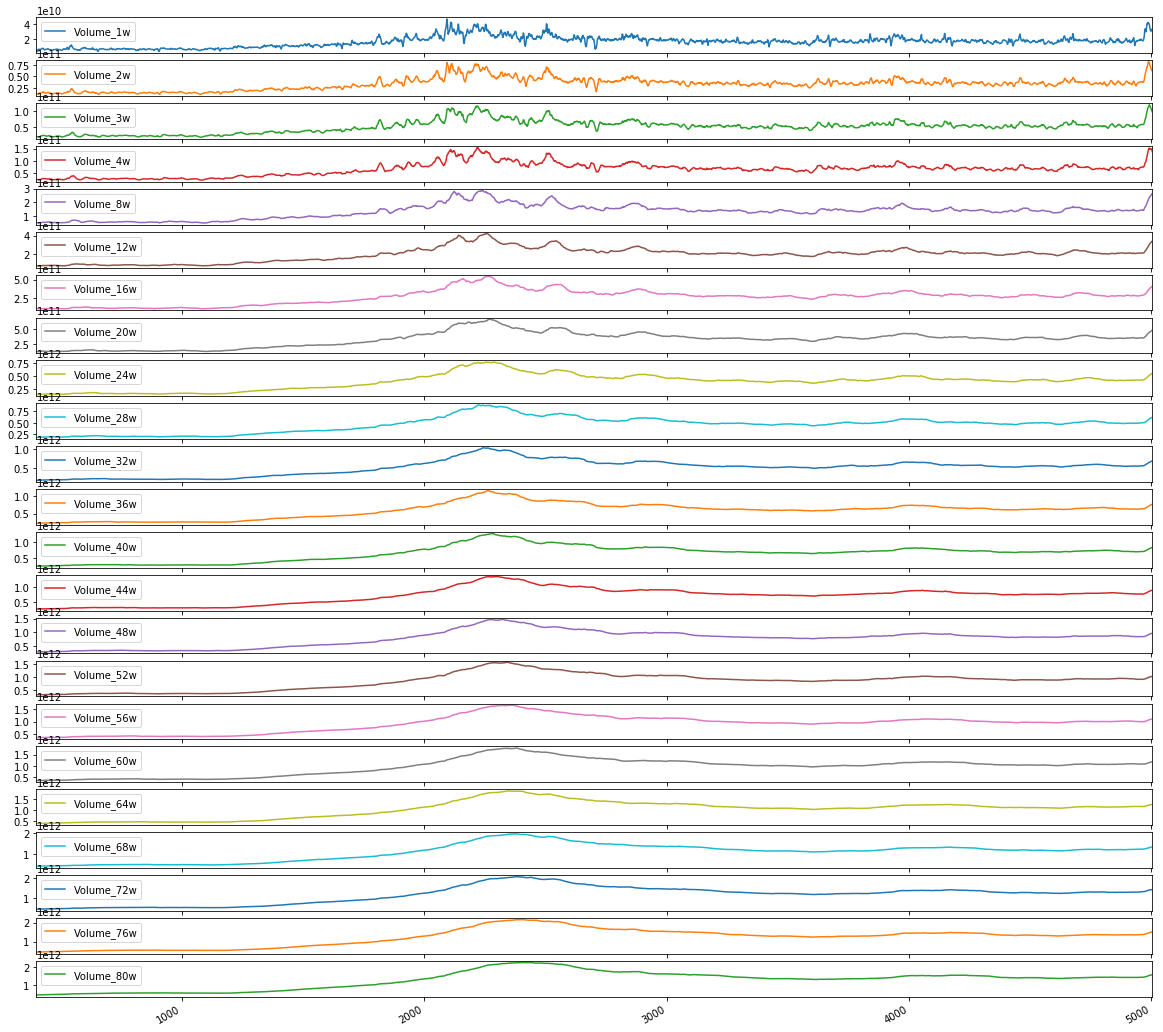

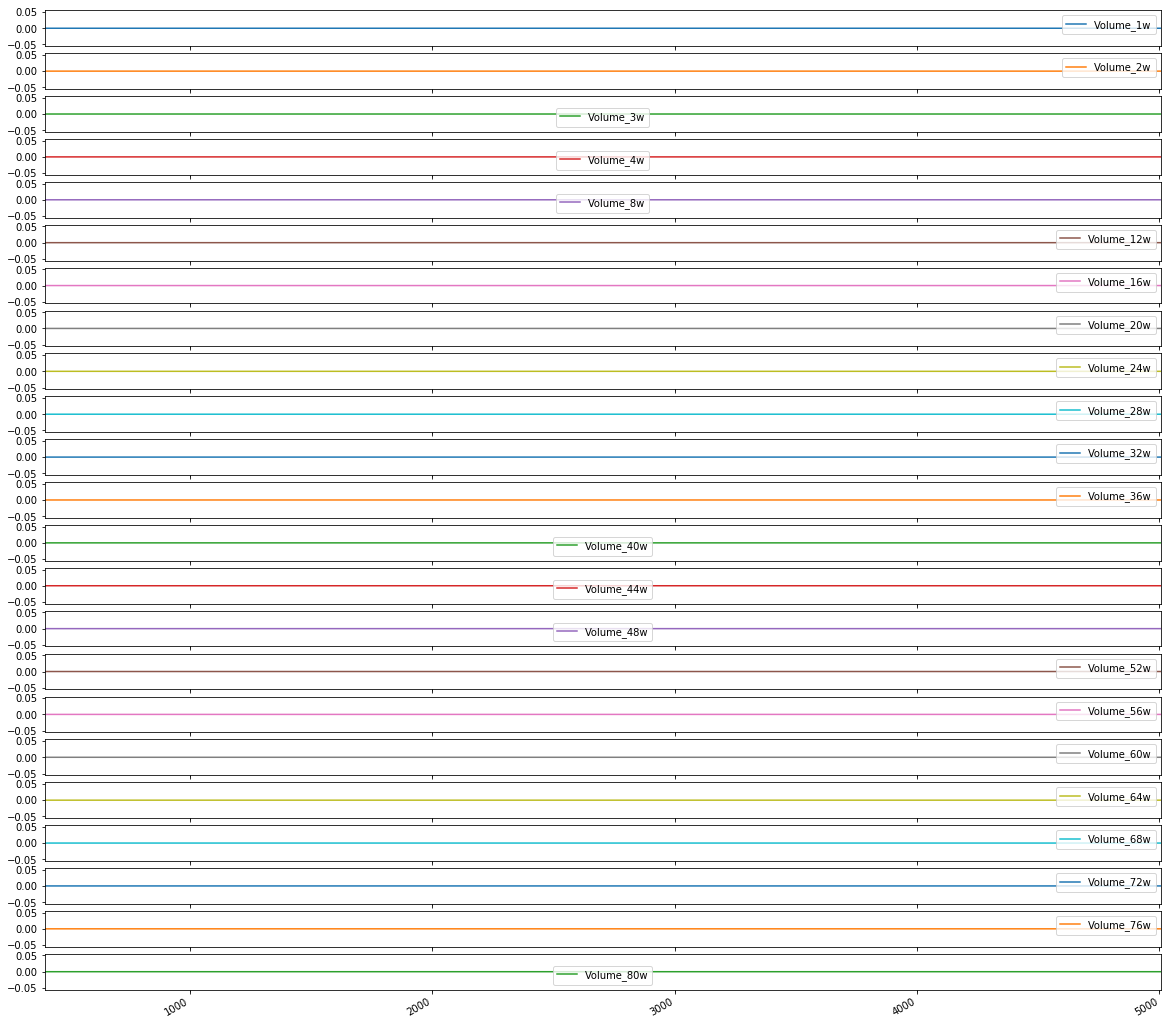

In [12]:
dji_index_data.iloc[:,2+len(period):2*len(period)+2].plot(subplots=True,figsize=(20,20))
gspc_index_data.iloc[:,2+len(period):2*len(period)+2].plot(subplots=True,figsize=(20,20))
wilshere_index_data.iloc[:,2+len(period):2*len(period)+2].plot(subplots=True,figsize=(20,20))

## Plot the Volatilities for each period

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F57C39F208>,
      dtype=object)

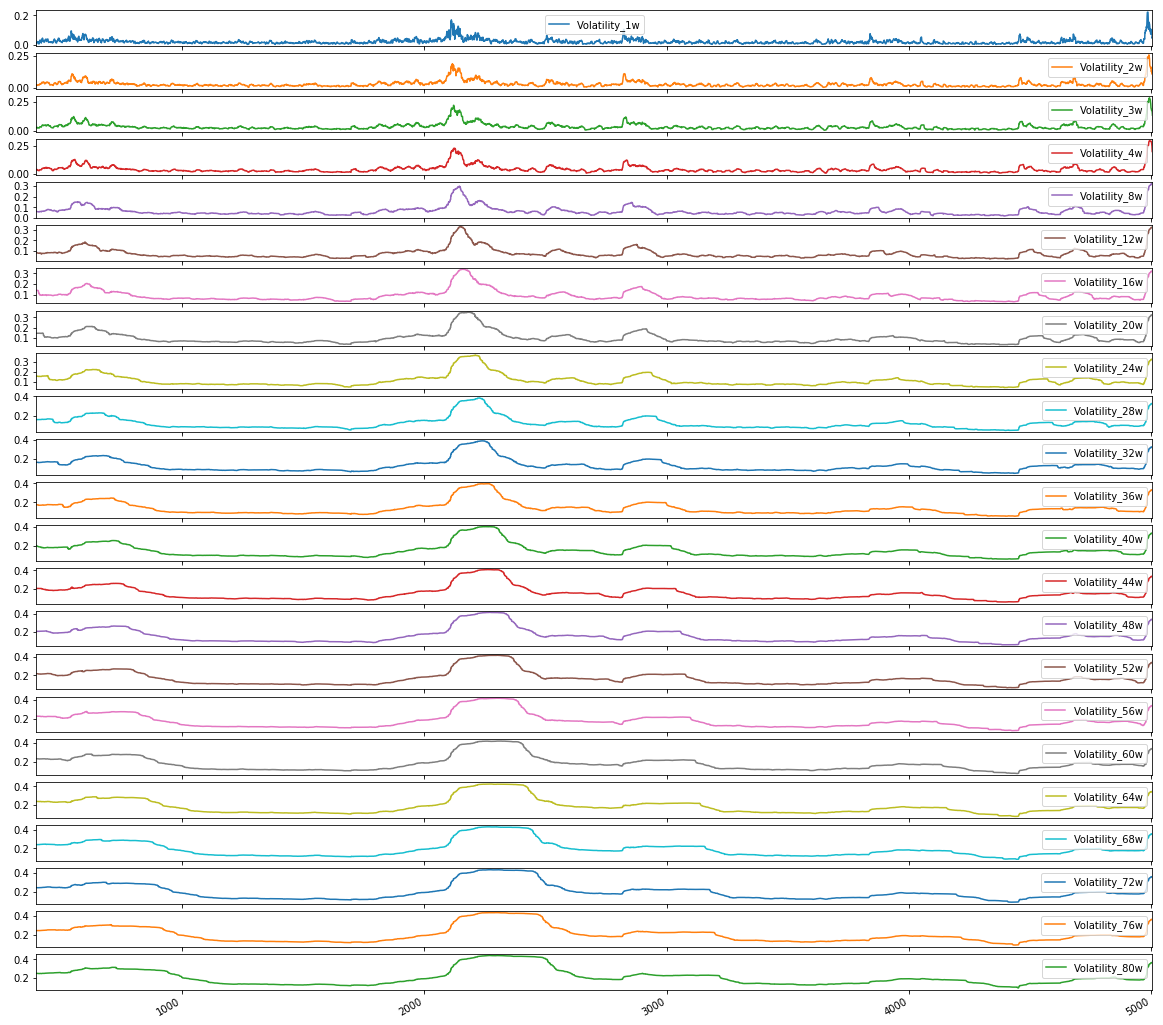

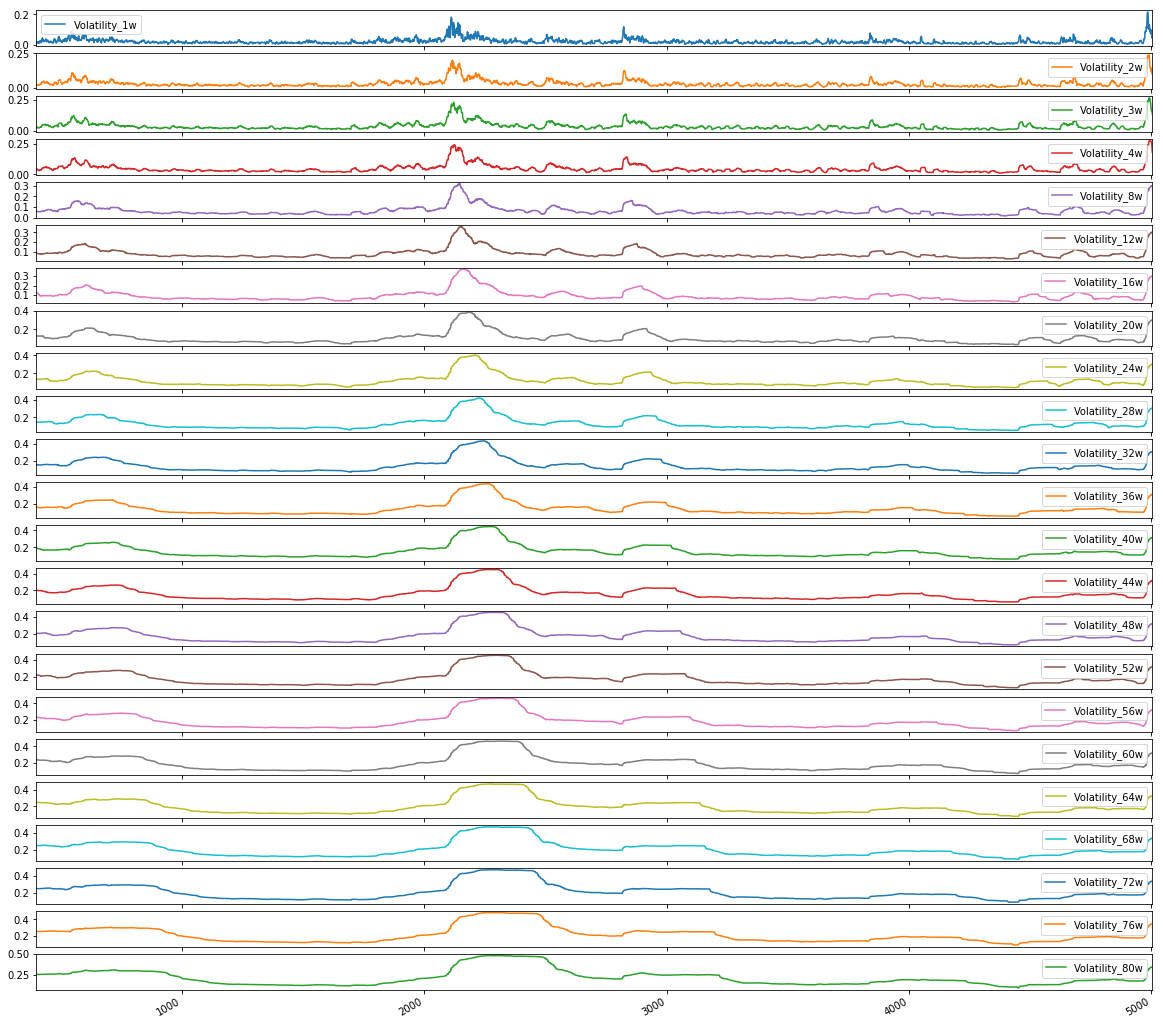

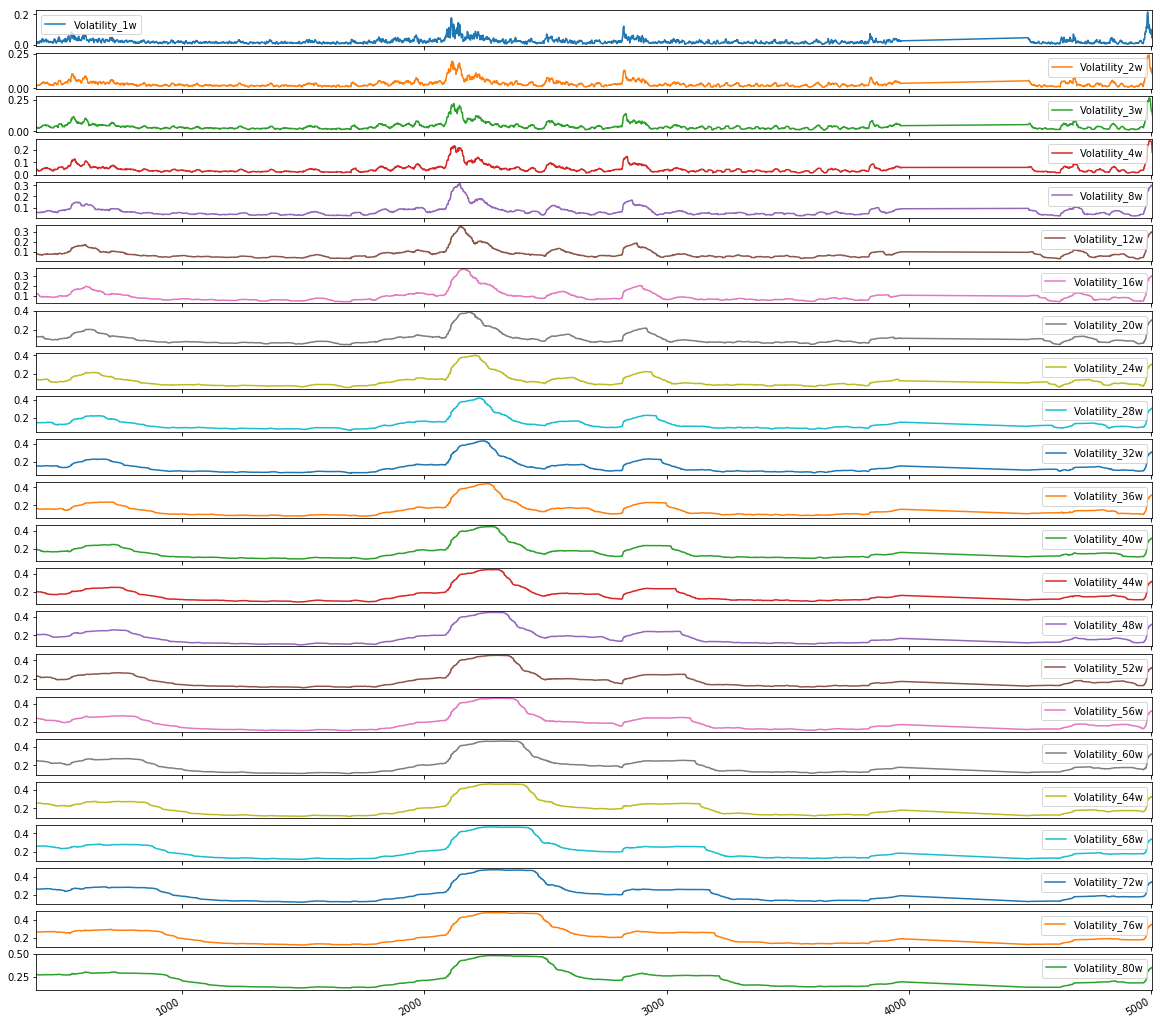

In [13]:
dji_index_data.iloc[:,2+2*len(period):3*len(period)+2].plot(subplots=True,figsize=(20,20))
gspc_index_data.iloc[:,2+2*len(period):3*len(period)+2].plot(subplots=True,figsize=(20,20))
wilshere_index_data.iloc[:,2+2*len(period):3*len(period)+2].plot(subplots=True,figsize=(20,20))

## Plot Correlation Matrix for Volatilty vs. Volume - DJIA

Text(0.5,0.98,'Volatility vs Volume')

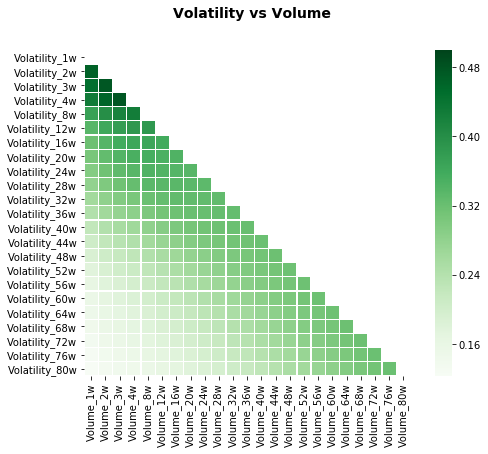

In [14]:
focus_cols_dji_volvol = dji_index_data.iloc[:,2+len(period):2+2*len(period)].columns
correlation_dji_volvol = dji_index_data.iloc[:,2+len(period):2+3*len(period)].corr().filter(focus_cols_dji_volvol).drop(focus_cols_dji_volvol)
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
mask = np.triu(correlation_dji_volvol)
heatmap_djia = sns.heatmap(correlation_dji_volvol,vmax=0.5,mask=mask,ax=ax,square=True,linewidths=0.2,cmap='Greens')
heat_fig.suptitle("Volatility vs Volume", fontsize=14, fontweight='bold')

## Plot Correlation Matrix for Volatilty vs. Volume- S&P 500

Text(0.5,0.98,'Volatility vs Volume')

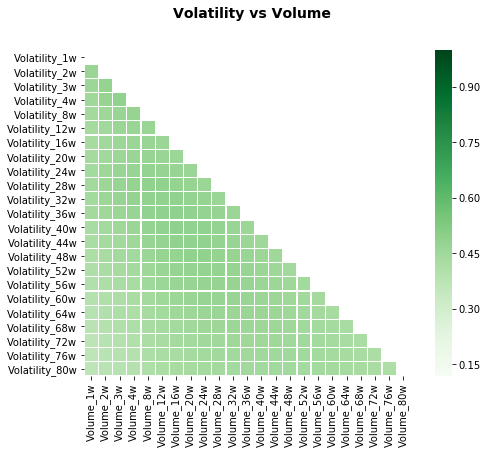

In [15]:
focus_cols_gspc_volvol = gspc_index_data.iloc[:,2+len(period):2+2*len(period)].columns
correlation_gspc_volvol = gspc_index_data.iloc[:,2+len(period):2+3*len(period)].corr().filter(focus_cols_gspc_volvol).drop(focus_cols_gspc_volvol)
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
mask = np.triu(correlation_gspc_volvol)
heatmap_gspc = sns.heatmap(correlation_gspc_volvol,vmax=1,mask=mask,ax=ax,square=True,linewidths=0.2,cmap='Greens')
heat_fig.suptitle("Volatility vs Volume", fontsize=14, fontweight='bold')

## Plot Correlation Matrix for Volatilty vs. Returns - DJIA

Text(0.5,0.98,'Return vs Volume')

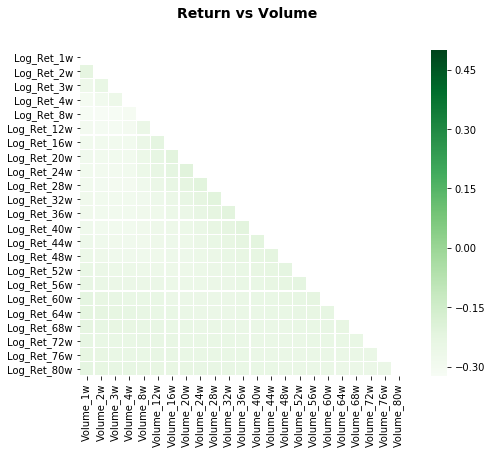

In [16]:
focus_cols_dji_volret = dji_index_data.iloc[:,2+len(period):2+2*len(period)].columns
correlation_dji_volret = dji_index_data.iloc[:,2:2+2*len(period)].corr().filter(focus_cols_dji_volret).drop(focus_cols_dji_volret)
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
mask = np.triu(correlation_dji_volret)
heatmap_djia = sns.heatmap(correlation_dji_volret,vmax=0.5,mask=mask,ax=ax,square=True,linewidths=0.2,cmap='Greens')
heat_fig.suptitle("Return vs Volume", fontsize=14, fontweight='bold')

## Plot Correlation Matrix for Volume vs. Returns - DJIA

Text(0.5,0.98,'Return vs Volume')

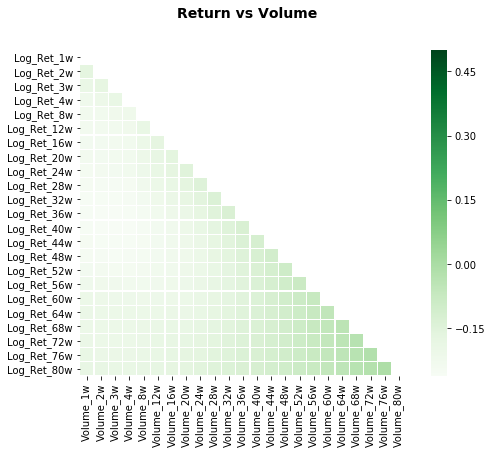

In [17]:
focus_cols_gspc_volret = gspc_index_data.iloc[:,2+len(period):2+2*len(period)].columns
correlation_gspc_volret = gspc_index_data.iloc[:,2:2+2*len(period)].corr().filter(focus_cols_gspc_volret).drop(focus_cols_gspc_volret)
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
mask = np.triu(correlation_gspc_volret)
heatmap_djia = sns.heatmap(correlation_gspc_volret,vmax=0.5,mask=mask,ax=ax,square=True,linewidths=0.2,cmap='Greens')
heat_fig.suptitle("Return vs Volume", fontsize=14, fontweight='bold')

## Plot Correlation Matrix for Volatility vs. Returns - DJI

Text(0.5,0.98,'Volatility vs. Return')

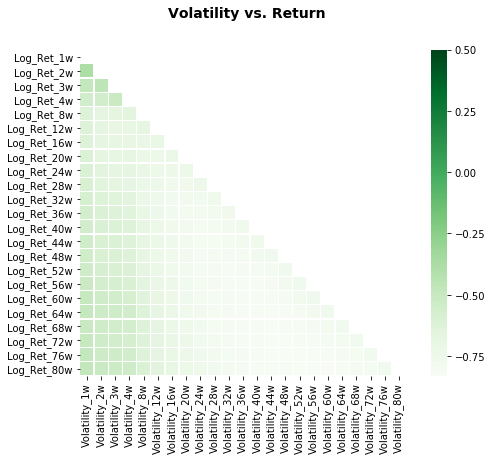

In [18]:
focus_cols_dji_volret1=dji_index_data.iloc[:,2+2*len(period):2+3*len(period)].columns 
correlation_dji_volret1=dji_index_data.iloc[:, np.r_[2:2+len(period), 2+2*len(period):2+3*len(period)]].corr().filter(focus_cols_dji_volret1).drop(focus_cols_dji_volret1)
mask=np.zeros_like(correlation_dji_volret1); mask[np.triu_indices_from(mask)]=True # we use mask to plot only part of the matrix
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
heat=sns.heatmap(correlation_dji_volret1, ax=ax, mask=mask, vmax=.5, square=True, linewidths=.2, cmap="Greens")
heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold')

## Plot Correlation Matrix for Volatility vs. Returns - S&P 500

Text(0.5,0.98,'Volatility vs. Return')

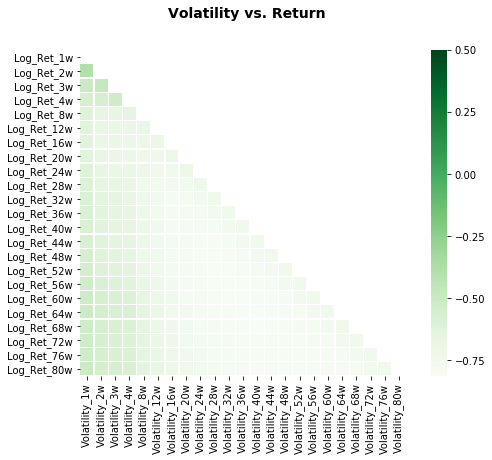

In [19]:
focus_cols_gspc_volret1=gspc_index_data.iloc[:,2+2*len(period):2+3*len(period)].columns 
correlation_gspc_volret1=gspc_index_data.iloc[:, np.r_[2:2+len(period), 2+2*len(period):2+3*len(period)]].corr().filter(focus_cols_gspc_volret1).drop(focus_cols_gspc_volret1)
mask=np.zeros_like(correlation_gspc_volret1); mask[np.triu_indices_from(mask)]=True # we use mask to plot only part of the matrix
heat_fig, (ax)=plt.subplots(1, 1, figsize=(9,6))
heat=sns.heatmap(correlation_gspc_volret1, ax=ax, mask=mask, vmax=.5, square=True, linewidths=.2, cmap="Greens")
heat_fig.suptitle('Volatility vs. Return', fontsize=14, fontweight='bold')

## Separate Test Data & Generate Baseline Model + LSTM Models

In [20]:
dji_outofsample_data = dji_index_data[dji_index_data['Date'] >= '2020-01-01']
gspc_outofsample_data = gspc_index_data[gspc_index_data['Date'] >= '2020-01-01']
wilshere_outofsample_data = wilshere_index_data[wilshere_index_data['Date'] >= '2020-01-01']

dji_train_data = dji_index_data[dji_index_data['Date'] < '2015-01-01']
gspc_train_data = gspc_index_data[gspc_index_data['Date'] < '2015-01-01']
wilshere_train_data = wilshere_index_data[wilshere_index_data['Date'] < '2015-01-01']

dji_test_data = dji_index_data[(dji_index_data['Date'] >= '2015-01-01') & (dji_index_data['Date'] < '2020-01-01')]
gspc_test_data = gspc_index_data[(gspc_index_data['Date'] >= '2015-01-01') & (gspc_index_data['Date'] < '2020-01-01')]
wilshere_test_data = wilshere_index_data[(wilshere_index_data['Date'] >= '2015-01-01') & (wilshere_index_data['Date'] < '2020-01-01')]

### Create Train , Test , Out Of Sample Splits for DJI, GSPC, Wilshere
#### One Factor, Two Factors and All Three Factors

In [21]:
# X Train for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_train_ret = dji_train_data.iloc[:, 2:2+len(period)]
gspc_train_ret = gspc_train_data.iloc[:, 2:2+len(period)]
wilshere_train_ret = wilshere_train_data.iloc[:, 2:2+len(period)]

dji_train_vol = dji_train_data.iloc[:, 2+len(period):2+2*len(period)]
gspc_train_vol = gspc_train_data.iloc[:, 2+len(period):2+2*len(period)]
wilshere_train_vol = wilshere_train_data.iloc[:, 2+len(period):2+2*len(period)]

dji_train_std = dji_train_data.iloc[:, 2+2*len(period):2+3*len(period)]
gspc_train_std = gspc_train_data.iloc[:, 2+2*len(period):2+3*len(period)]
wilshere_train_std = wilshere_train_data.iloc[:, 2+2*len(period):2+3*len(period)]

# X Test for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_test_ret = dji_test_data.iloc[:, 2:2+len(period)]
gspc_test_ret = gspc_test_data.iloc[:, 2:2+len(period)]
wilshere_test_ret = wilshere_test_data.iloc[:, 2:2+len(period)]

dji_test_vol = dji_test_data.iloc[:, 2+len(period):2+2*len(period)]
gspc_test_vol = gspc_test_data.iloc[:, 2+len(period):2+2*len(period)]
wilshere_test_vol = wilshere_test_data.iloc[:, 2+len(period):2+2*len(period)]

dji_test_std = dji_test_data.iloc[:, 2+2*len(period):2+3*len(period)]
gspc_test_std = gspc_test_data.iloc[:, 2+2*len(period):2+3*len(period)]
wilshere_test_std = wilshere_test_data.iloc[:, 2+2*len(period):2+3*len(period)]

# Y Train for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_train_label = dji_train_data.iloc[:, -1]
gspc_train_label = gspc_train_data.iloc[:, -1]
wilshere_train_label = wilshere_train_data.iloc[:, -1]

# Y Test for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_test_label = dji_test_data.iloc[:, -1]
gspc_test_label = gspc_test_data.iloc[:, -1]
wilshere_test_label = wilshere_test_data.iloc[:, -1]

# Out Of Time X Sample for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_outofsample_ret = dji_outofsample_data.iloc[:, 2:2+len(period)]
gspc_outofsample_ret = gspc_outofsample_data.iloc[:, 2:2+len(period)]
wilshere_outofsample_ret = wilshere_outofsample_data.iloc[:, 2:2+len(period)]

dji_outofsample_vol = dji_outofsample_data.iloc[:, 2+len(period):2+2*len(period)]
gspc_outofsample_vol = gspc_outofsample_data.iloc[:, 2+len(period):2+2*len(period)]
wilshere_outofsample_vol = wilshere_outofsample_data.iloc[:, 2+len(period):2+2*len(period)]

dji_outofsample_std = dji_outofsample_data.iloc[:, 2+2*len(period):2+3*len(period)]
gspc_outofsample_std = gspc_outofsample_data.iloc[:, 2+2*len(period):2+3*len(period)]
wilshere_outofsample_std = wilshere_outofsample_data.iloc[:, 2+2*len(period):2+3*len(period)]

# Out Of Time Y Sample for DJI, GSPC, Wilshere for Returns, Volume, Volatility separately
dji_outofsample_label = dji_outofsample_data.iloc[:, -1]
gspc_outofsample_label = gspc_outofsample_data.iloc[:, -1]
wilshere_outofsample_label = wilshere_outofsample_data.iloc[:, -1]

In [22]:
# X Train for DJI, GSPC, Wilshere for Returns-Volume, Returns-Volatility, Volume-Volatility separately
dji_train_retvol = pd.concat([dji_train_ret,dji_train_vol],axis=1)
gspc_train_retvol = pd.concat([gspc_train_ret,gspc_train_vol],axis=1)
wilshere_train_retvol = pd.concat([wilshere_train_ret,wilshere_train_vol],axis=1)

dji_train_volstd = pd.concat([dji_train_vol,dji_train_std],axis=1)
gspc_train_volstd = pd.concat([gspc_train_vol,gspc_train_std],axis=1)
wilshere_train_volstd = pd.concat([wilshere_train_vol,wilshere_train_std],axis=1)

dji_train_retstd = pd.concat([dji_train_ret,dji_train_std],axis=1)
gspc_train_retstd = pd.concat([gspc_train_ret,gspc_train_std],axis=1)
wilshere_train_retstd = pd.concat([wilshere_train_ret,wilshere_train_std],axis=1)

# X Test for DJI, GSPC, Wilshere for Returns-Volume, Returns-Volatility, Volume-Volatility separately
dji_test_retvol = pd.concat([dji_test_ret,dji_test_vol],axis=1)
gspc_test_retvol = pd.concat([gspc_test_ret,gspc_test_vol],axis=1)
wilshere_test_retvol = pd.concat([wilshere_test_ret,wilshere_test_vol],axis=1)

dji_test_volstd = pd.concat([dji_test_vol,dji_test_std],axis=1)
gspc_test_volstd = pd.concat([gspc_test_vol,gspc_test_std],axis=1)
wilshere_test_volstd = pd.concat([wilshere_test_vol,wilshere_test_std],axis=1)

dji_test_retstd = pd.concat([dji_test_ret,dji_test_std],axis=1)
gspc_test_retstd = pd.concat([gspc_test_ret,gspc_test_std],axis=1)
wilshere_test_retstd = pd.concat([wilshere_test_ret,wilshere_test_std],axis=1)

# Y Train and Y Test are the same as above Block as well Y out of Sample

# Out Of Time X Sample for DJI, GSPC, Wilshere for 2 Factors Simultaneously
dji_outofsample_retvol = pd.concat([dji_outofsample_ret,dji_outofsample_vol],axis=1)
gspc_outofsample_retvol = pd.concat([gspc_outofsample_ret,gspc_outofsample_vol],axis=1)
wilshere_outofsample_retvol = pd.concat([wilshere_outofsample_ret,wilshere_outofsample_vol],axis=1)

dji_outofsample_volstd = pd.concat([dji_outofsample_vol,dji_outofsample_std],axis=1)
gspc_outofsample_volstd = pd.concat([gspc_outofsample_vol,gspc_outofsample_std],axis=1)
wilshere_outofsample_volstd = pd.concat([wilshere_outofsample_vol,wilshere_outofsample_std],axis=1)

dji_outofsample_retstd = pd.concat([dji_outofsample_ret,dji_outofsample_std],axis=1)
gspc_outofsample_retstd = pd.concat([gspc_outofsample_ret,gspc_outofsample_std],axis=1)
wilshere_outofsample_retstd = pd.concat([wilshere_outofsample_ret,wilshere_outofsample_std],axis=1)

In [23]:
# X Train, Test for DJI, GSPC, Wilshere for Return, Volume, Volatility simultaneously
dji_train_retvolstd = pd.concat([dji_train_ret,dji_train_vol,dji_train_std],axis=1)
gspc_train_retvolstd = pd.concat([gspc_train_ret,gspc_train_vol,gspc_train_std],axis=1)
wilshere_train_retvolstd = pd.concat([wilshere_train_ret,wilshere_train_vol,wilshere_train_std],axis=1)

dji_test_retvolstd = pd.concat([dji_test_ret,dji_test_vol,dji_test_std],axis=1)
gspc_test_retvolstd = pd.concat([gspc_test_ret,gspc_test_vol,gspc_test_std],axis=1)
wilshere_test_retvolstd = pd.concat([wilshere_test_ret,wilshere_test_vol,wilshere_test_std],axis=1)

# Y Train and Y Test are same as previous block as well Y out of sample

# Out Of Time X Sample for DJI, GSPC, Wilshere for all 3 factors
dji_outofsample_retvolstd = pd.concat([dji_outofsample_ret,dji_outofsample_vol,dji_outofsample_std],axis=1)
gspc_outofsample_retvolstd = pd.concat([gspc_outofsample_ret,gspc_outofsample_vol,gspc_outofsample_std],axis=1)
wilshere_outofsample_retvolstd = pd.concat([wilshere_outofsample_ret,wilshere_outofsample_vol,wilshere_outofsample_std],axis=1)

In [24]:
# Standardized Data
steps_baseline_scaler=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), 
           ('logistic', linear_model.SGDClassifier(loss="log", shuffle=False, tol=1e-3, random_state=1))]

#Normalized Data
steps_baseline_normal=[('scaler', MinMaxScaler(feature_range=(0, 1), copy=True)), ('logistic', linear_model.SGDClassifier(loss="log", shuffle=False, tol=1e-3, random_state=1))]

# Using a pipeline we glue together the Scaler & the Classifier # This ensure that during cross validation the Scaler is fitted to only the training folds
pipeline_baseline_scaler = Pipeline(steps_baseline_scaler) 
pipeline_baseline_normal = Pipeline(steps_baseline_normal)

# Penalties
penalty_baseline=['l1', 'l2', 'elasticnet']

# Evaluation Metric
scoring_baseline={'AUC': 'roc_auc', 'accuracy': make_scorer(accuracy_score)} #multiple evaluation metrics
metric_baseline='accuracy' #scorer is used to find the best parameters for refitting the estimator at the end

In [26]:
# Baseline Model - GridSearch
Baseline_List_XTrain=[dji_train_ret,dji_train_vol,dji_train_std,dji_train_retvol,dji_train_volstd,dji_train_retstd,dji_train_retvolstd,gspc_train_ret,gspc_train_vol,gspc_train_std,gspc_train_retvol,gspc_train_volstd,gspc_train_retstd,gspc_train_retvolstd,wilshere_train_ret,wilshere_train_vol,wilshere_train_std,wilshere_train_retvol,wilshere_train_volstd,wilshere_train_retstd,wilshere_train_retvolstd]
Baseline_List_XTest=[dji_test_ret,dji_test_vol,dji_test_std,dji_test_retvol,dji_test_volstd,dji_test_retstd,dji_test_retvolstd,gspc_test_ret,gspc_test_vol,gspc_test_std,gspc_test_retvol,gspc_test_volstd,gspc_test_retstd,gspc_test_retvolstd,wilshere_test_ret,wilshere_test_vol,wilshere_test_std,wilshere_test_retvol,wilshere_test_volstd,wilshere_test_retstd,wilshere_test_retvolstd]
Baseline_List_XOutofSample=[dji_outofsample_ret,dji_outofsample_vol,dji_outofsample_std,dji_outofsample_retvol,dji_outofsample_volstd,dji_outofsample_retstd,dji_outofsample_retvolstd,gspc_outofsample_ret,gspc_outofsample_vol,gspc_outofsample_std,gspc_outofsample_retvol,gspc_outofsample_volstd,gspc_outofsample_retstd,gspc_outofsample_retvolstd,wilshere_outofsample_ret,wilshere_outofsample_vol,wilshere_outofsample_std,wilshere_outofsample_retvol,wilshere_outofsample_volstd,wilshere_outofsample_retstd,wilshere_outofsample_retvolstd]
Baseline_List_YTrain=[dji_train_label]*7+[gspc_train_label]*7+[wilshere_train_label]*7
Baseline_List_YTest=[dji_test_label]*7+[gspc_test_label]*7+[wilshere_test_label]*7
Baseline_List_YOutofSample=[dji_outofsample_label]*7+[gspc_outofsample_label]*7+[wilshere_outofsample_label]*7
# Time Series Split
dev_size=0.1 
n_splits=int((1//dev_size)-1)   # using // for integer division
tscv=TimeSeriesSplit(n_splits=n_splits) 

# Number of Iterations
num_iterations_baseline = [10]

#Regularization for L1,L2
alpha_grid_baseline = [0.01, 0.011, 0.012]
l1_ratio_baseline = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Hyperparameter Tuning
hyperparameters_grid_baseline = {'logistic__alpha': alpha_grid_baseline,
                                 'logistic__l1_ratio': l1_ratio_baseline,
                                 'logistic__penalty': penalty_baseline,
                                 'logistic__max_iter': num_iterations_baseline}

# Create Grid Search
gridsearch_baseline = GridSearchCV(estimator=pipeline_baseline_scaler,
                                   param_grid = hyperparameters_grid_baseline,
                                   scoring = scoring_baseline,
                                   n_jobs=-1,
                                   cv=tscv,
                                   refit=metric_baseline,
                                   verbose=1,
                                   return_train_score=False)

# Fit Grid Search
Model_Dictionary = {}
for i in range(len(Baseline_List_XTrain)):
    Model_Dictionary[i] = {}
for i in range(len(Baseline_List_XTrain)):
    
    tuned_model_baseline=gridsearch_baseline.fit(Baseline_List_XTrain[i], Baseline_List_YTrain[i])
    Model_Dictionary[i]['Logistic Loss'] = tuned_model_baseline.best_estimator_.get_params()['logistic__loss']
    Model_Dictionary[i]['Accuracy'] = tuned_model_baseline.best_score_
    Model_Dictionary[i]['Max Iterations'] = tuned_model_baseline.best_estimator_.get_params()['logistic__max_iter']
    Model_Dictionary[i]['Penalty'] = tuned_model_baseline.best_estimator_.get_params()['logistic__penalty']
    Model_Dictionary[i]['Alpha'] = tuned_model_baseline.best_estimator_.get_params()['logistic__alpha']
    Model_Dictionary[i]['Logistic L1 Ratio'] = tuned_model_baseline.best_estimator_.get_params()['logistic__l1_ratio']
    Model_Dictionary[i]['Number Of Features'] = len(tuned_model_baseline.best_estimator_.steps[1][1].coef_[0][:])
    Model_Dictionary[i]['Number of Non Zero Features'] = np.count_nonzero(tuned_model_baseline.best_estimator_.steps[1][1].coef_[0][:])
    Model_Dictionary[i]['Pivot Table'] = pd.pivot_table(pd.DataFrame(tuned_model_baseline.cv_results_),values='mean_test_accuracy',index='param_logistic__l1_ratio',columns='param_logistic__alpha')
    
    # Make predictions
    Baseline_List_YPred=tuned_model_baseline.predict(Baseline_List_XTest[i])

    # create confustion matrix
    Model_Dictionary[i]['Test_Confusion_Matrix'] = pd.DataFrame(metrics.confusion_matrix(Baseline_List_YTest[i], Baseline_List_YPred))
    Model_Dictionary[i]['Test_Accuracy'] = metrics.accuracy_score(Baseline_List_YTest[i], Baseline_List_YPred)
    Model_Dictionary[i]['Test_Precision'] = metrics.precision_score(Baseline_List_YTest[i], Baseline_List_YPred)
    Model_Dictionary[i]['Test_Recall'] = metrics.recall_score(Baseline_List_YTest[i], Baseline_List_YPred)
    
    Y_Predict_Proba=tuned_model_baseline.predict_proba(Baseline_List_XTest[i])[:, 1]
    fpr, tpr, _=metrics.roc_curve(Baseline_List_YTest[i],  Y_Predict_Proba)
    Model_Dictionary[i]['Test_AUC_Score']=metrics.roc_auc_score(Baseline_List_YTest[i], Y_Predict_Proba)
    
    # Make predictions
    Baseline_List_YPred=tuned_model_baseline.predict(Baseline_List_XOutofSample[i])

    # create confustion matrix
    Model_Dictionary[i]['OutofSample_Confusion_Matrix'] = pd.DataFrame(metrics.confusion_matrix(Baseline_List_YOutofSample[i], Baseline_List_YPred))
    Model_Dictionary[i]['OutofSample_Accuracy'] = metrics.accuracy_score(Baseline_List_YOutofSample[i], Baseline_List_YPred)
    Model_Dictionary[i]['OutofSample_Precision'] = metrics.precision_score(Baseline_List_YOutofSample[i], Baseline_List_YPred)
    Model_Dictionary[i]['OutofSample_Recall'] = metrics.recall_score(Baseline_List_YOutofSample[i], Baseline_List_YPred)
    
    Y_Predict_Proba=tuned_model_baseline.predict_proba(Baseline_List_XOutofSample[i])[:, 1]
    fpr, tpr, _=metrics.roc_curve(Baseline_List_YOutofSample[i],  Y_Predict_Proba)
    Model_Dictionary[i]['OutofSample_AUC_Score']=metrics.roc_auc_score(Baseline_List_YOutofSample[i], Y_Predict_Proba)
    
    print(str(i)+' Done')


Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   10.3s finished


0 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   10.4s finished


1 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   10.5s finished


2 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   13.2s finished


3 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   13.1s finished


4 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   12.6s finished


5 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   14.4s finished


6 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.9s finished


7 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.1s finished


8 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.2s finished


9 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   12.5s finished


10 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   12.6s finished


11 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   12.3s finished


12 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   14.2s finished


13 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.0s finished


14 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   10.8s finished


15 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.2s finished


16 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   12.9s finished


17 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.8s finished


18 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   11.8s finished


19 Done
Fitting 8 folds for each of 54 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   15.4s finished


20 Done


In [27]:
from sklearn.externals import joblib
joblib.dump(Model_Dictionary,'Baseline_Model.pkl')

['Baseline_Model.pkl']

In [60]:
Baseline_List_XTrain_LSTM = []
Baseline_List_XTest_LSTM = []
for i in range(len(Baseline_List_XTrain)):
    Baseline_List_XTrain_LSTM.append(Baseline_List_XTrain[i].values.reshape(Baseline_List_XTrain[i].shape[0],1,Baseline_List_XTrain[i].shape[1]))
    Baseline_List_XTest_LSTM.append(Baseline_List_XTest[i].values.reshape(Baseline_List_XTest[i].shape[0],1,Baseline_List_XTest[i].shape[1]))

In [86]:
batch_size = [32,64]
dropout = [0.0,0.5]
epochs = [5,10]
hidden_layers = [3,5,10]
step_size = 1

for bs in batch_size:
    for do in dropout:
        for ep in epochs:
            for hl in hidden_layers:
                model = Sequential()
                model.add(LSTM(256, input_shape=(1,Baseline_List_XTrain_LSTM[6].shape[2]), return_sequences=True))
                for i in range(hl):
                    model.add(LSTM(256, return_sequences=True))
                    model.add(Dropout(do))
                model.add(LSTM(128, return_sequences=False))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
                print(bs,do,ep,hl)
                model.fit(Baseline_List_XTrain_LSTM[6], Baseline_List_YTrain[6].values, shuffle=False,batch_size=bs,epochs=ep,verbose=True)



32 0.0 5 3
Epoch 1/5
3276/3276 [==============================] - 121s 37ms/step - loss: 0.6878 - acc: 0.5723
Epoch 2/5
3276/3276 [==============================] - 44s 13ms/step - loss: 0.6799 - acc: 0.6197
Epoch 3/5
3276/3276 [==============================] - 45s 14ms/step - loss: 0.6752 - acc: 0.6197
Epoch 4/5
3276/3276 [==============================] - 44s 14ms/step - loss: 0.6704 - acc: 0.6197
Epoch 5/5
3276/3276 [==============================] - 45s 14ms/step - loss: 0.6683 - acc: 0.6197
32 0.0 5 5
Epoch 1/5
3276/3276 [==============================] - 144s 44ms/step - loss: 0.6813 - acc: 0.5757
Epoch 2/5
3276/3276 [==============================] - 60s 18ms/step - loss: 0.6735 - acc: 0.6197
Epoch 3/5
3276/3276 [==============================] - 65s 20ms/step - loss: 0.6695 - acc: 0.6197
Epoch 4/5
3276/3276 [==============================] - 64s 20ms/step - loss: 0.6691 - acc: 0.6197
Epoch 5/5
3276/3276 [==============================] - 65s 20ms/step - loss: 0.6686 - acc: 0.6

KeyboardInterrupt: 

In [74]:
Baseline_List_YTrain[0].shape

(3276,)